Diabetes is a long-lasting disease triggered by expanded sugar levels in human blood and can affect various organs if left untreated. It contributes to heart disease, kidney issues, damaged nerves, damaged blood vessels, and blindness. Timely disease prediction can save precious lives and enable healthcare advisors to take care of the conditions. Most diabetic patients know little about the risk factors they face before diagnosis. 

Diabetes data was gathered from the UCI repository.The dataset utilized here comprises of 520 instances, with 17 attributes including a class attribute used to predict the positive and negative rate of chances of having diabetes or not.The dataset is created by clinical treatment data that were gathered by direct surveys from Sylhet Diabetes Hospital patients in Sylhet, Bangladesh, and were validated by the doctors.

### Data Preprocessing

##### Importing all the required python linbraries

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor

##### Loading the dataset

In [14]:
df = pd.read_csv(r"C:\Users\shilp\Downloads\diabetes.csv")

##### Data Exploration

In [15]:
# look at the data
df.head(3) # note that we don't want to dump all the data to the screen

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive


In [16]:
# generate a basic summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [17]:
df.describe()


,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


##### Checking for null Values

In [18]:
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [19]:
df.columns = [s.strip().upper().replace(' ', '_') for s in df.columns] 

In [20]:
df.columns

Index(['AGE', 'GENDER', 'POLYURIA', 'POLYDIPSIA', 'SUDDEN_WEIGHT_LOSS',
       'WEAKNESS', 'POLYPHAGIA', 'GENITAL_THRUSH', 'VISUAL_BLURRING',
       'ITCHING', 'IRRITABILITY', 'DELAYED_HEALING', 'PARTIAL_PARESIS',
       'MUSCLE_STIFFNESS', 'ALOPECIA', 'OBESITY', 'CLASS'],
      dtype='object')

##### Seperating the dependent and independent variables

In [21]:
y = df.pop('CLASS')
X = df

##### Splitting the dataset into training and test sets in 70:30 ratio

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [23]:
print(y_train)

122    Positive
168    Positive
23     Positive
13     Positive
61     Positive
         ...   
129    Positive
144    Positive
72     Positive
235    Negative
37     Positive
Name: CLASS, Length: 364, dtype: object


In [24]:
# create a list of catagorical variables
category_var_list = list(df.select_dtypes(include='object').columns)
category_var_list

['GENDER',
 'POLYURIA',
 'POLYDIPSIA',
 'SUDDEN_WEIGHT_LOSS',
 'WEAKNESS',
 'POLYPHAGIA',
 'GENITAL_THRUSH',
 'VISUAL_BLURRING',
 'ITCHING',
 'IRRITABILITY',
 'DELAYED_HEALING',
 'PARTIAL_PARESIS',
 'MUSCLE_STIFFNESS',
 'ALOPECIA',
 'OBESITY']

##### Explore the categorical variable values

In [25]:
for cat in category_var_list: 
    print(f"Category: {cat} Values: {df[cat].unique()}")

Category: GENDER Values: ['Male' 'Female']
Category: POLYURIA Values: ['No' 'Yes']
Category: POLYDIPSIA Values: ['Yes' 'No']
Category: SUDDEN_WEIGHT_LOSS Values: ['No' 'Yes']
Category: WEAKNESS Values: ['Yes' 'No']
Category: POLYPHAGIA Values: ['No' 'Yes']
Category: GENITAL_THRUSH Values: ['No' 'Yes']
Category: VISUAL_BLURRING Values: ['No' 'Yes']
Category: ITCHING Values: ['Yes' 'No']
Category: IRRITABILITY Values: ['No' 'Yes']
Category: DELAYED_HEALING Values: ['Yes' 'No']
Category: PARTIAL_PARESIS Values: ['No' 'Yes']
Category: MUSCLE_STIFFNESS Values: ['Yes' 'No']
Category: ALOPECIA Values: ['Yes' 'No']
Category: OBESITY Values: ['Yes' 'No']


##### Label encoding the categorical variables for easy interpretation by our machine learning models

In [26]:
# Encoding the training sets first and then transforming the test sets to avoid data leakeges
# We can also go ahead with one hot encoding in our scenario. 
# We choose label encoder as it would not create much redundancy if the data set is updated with huge number of records in the future

for col in category_var_list:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
print(le.classes_)



y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
print(le.classes_)


['No' 'Yes']
['Negative' 'Positive']


In [27]:
print(y_train)
print(X_train)

[1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0
 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0
 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1
 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1
 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1
 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1
 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0
 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1]
     AGE  GENDER  POLYURIA  POLYDIPSIA  SUDDEN_WEIGHT_LOSS  WEAKNESS  \
122   40       1         0           1                   0         1   
168   37       1         0           0                   0         1   
23    48       1         0           1       

##### Checking for Imbalance in data so that our model is not biased

In [28]:
# Convert y_train to pandas Series
y_train = pd.Series(y_train.ravel())

# Check value counts of y_train
print(y_train.value_counts())


1    222
0    142
dtype: int64


##### We can see that the data is pretty imbalanced that can make our model biased

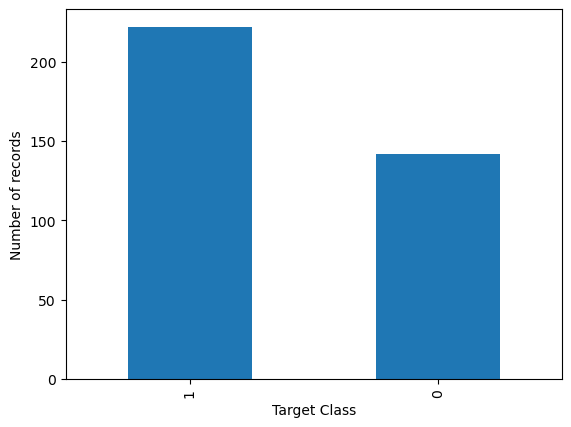

In [29]:
import matplotlib.pyplot as plt
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

In [30]:
print(X_train.shape)
print(y_train.shape)


(364, 16)
(364,)


##### We will be using random oversampler to oversample the minority class, in our case the 0's ie. the negatives

In [31]:
ros = RandomOverSampler(random_state=1)
X_train, y_train = ros.fit_resample(X_train, y_train)
y_train.value_counts()

1    222
0    222
dtype: int64

##### The data is balanced now

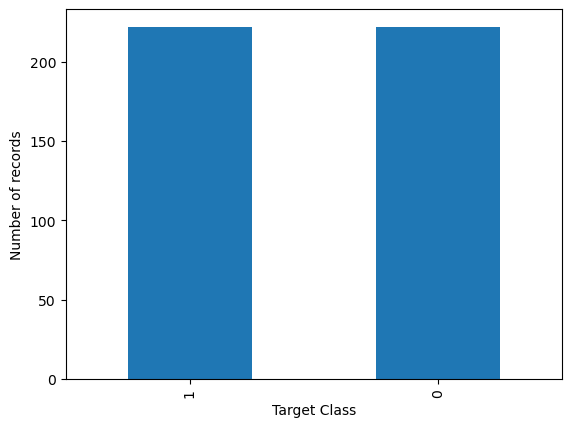

In [32]:
import matplotlib.pyplot as plt
count = y_train.value_counts()
count.plot.bar()
plt.ylabel('Number of records')
plt.xlabel('Target Class')
plt.show()

##### Storing the processed training and test sets of target and independent variables as CSV's

In [38]:

X_train.to_csv('C:/Users/shilp/Downloads/X_train.csv', index=False)

X_test.to_csv('C:/Users/shilp/Downloads/X_test.csv', index=False)

y_train_df = pd.DataFrame(y_train, columns=['CLASS'])
y_train_df.to_csv('C:/Users/shilp/Downloads/y_train.csv', index=False)
y_test_df = pd.DataFrame(y_test, columns=['CLASS'])
y_test_df.to_csv('C:/Users/shilp/Downloads/y_test.csv', index=False)